In [1]:
from common import utils
import random
u=utils(False)

Ce cours a été régénéré le 2018-08-28 17:25:43.681601


# Les textes
## De l'écrit aux nombres
### Du texte au(x) glyphe(s)

Les écrits sous forme d'images ne sont pas exploitables; l'écriture est donc simplifiée pour ne retenir que les *caractères* les uns à la suite des autres (≠*lettres*).

On a assemblé les caractères qui étaient nécessaires pour écrire une langue en « alphabets » qui comprenaient lettres, chiffres, caractères de ponctuation et autres symboles techniques. Ces ensemble s'appellent des *jeux de caractères*.

Cette technique descend des techniques inventées par les Chinois (IX<sup>e</sup> siècle) et les Européens (Gutenberg, XV<sup>e</sup> siècle). Les jeux de caractères étaient alors physiquement des collections d'éléments mobiles (en bois, en terre cuite, en plomb...) qui étaient rangés dans une caisse (appellée *casse*) et servaient à transférer de l'encre sur du papier.

De nos jours, les caractères ne sont pas rangés dans une caisse, ils sont contenus dans une sorte de programme informatique spécialisé qu'on appelle une police (anglais : *font*) et qui correspond à la dénomination ancienne en imprimerie.

Les raisons historiques font qu'on a eu des jeux de caractères différents selon les régions et les fabricants. Depuis les années 2000, un jeu de caractères qui contient tous les autres s'impose lentement : le jeu de caractère [Unicode](https://fr.wikipedia.org/wiki/Unicode).

Les glyphes sont les dessins des lettres, différents selon les polices. Une même police de caractère peut supporter plusieurs jeux de caractères (tant qu'il sait faire l'association caractère → glyphe), le dessin proprement dit n'est stocké qu'une seule fois.

Parce que les ordinateurs manient très bien les nombre, un texte est donc représenté par des nombres dont les valeurs sont fixées par le jeu de caractères. Toutefois, selon ces jeux de caractères, les nombres peuvent atteindre de grandes valeurs. Lorsque le nombre de caractères possibles ne dépasse pas 256, on utilise un octet pour chaque caractère ; mais sinon, on doit recourir à un *encodage* plus compliqué qui va permettre de transformer le nombre en un ou plusieurs octets. Cette table doit permettre évidemment d'aller dans un sens, et dans l'autre.

![test](images/A-small_glyphs.svg)


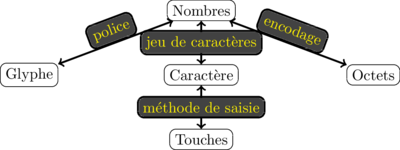

In [2]:
%%tikz
        \tikzstyle{every node}=[fill=white,draw=black,rounded corners]
        \tikzstyle{xlabel}=[text=yellow,fill=black!80,fill opacity=30,text opacity=1]
        \tikzstyle{normally}=[very thick]
        \node (a) at (0,0) {Glyphe};
        \node (b) at (4,1.5) {Nombres}
        edge  [<->,normally] node[xlabel,above,sloped] {police} (a);
        \node (c) at (4,0) {Caractère}
        edge  [<->,normally] node[xlabel] {jeu de caractères} (b);
        \node (d) at (4,-1.5) {Touches}
        edge  [<->,normally] node[xlabel] {méthode de saisie} (c);
        \node (d) at (8,0) {Octets}
        edge  [<->,normally] node[xlabel,above,sloped] {encodage} (b);


### Les ligatures
Les ligatures sont une caractéristique de l'écriture qui vient de l'écriture manuscrite. Cela consiste à modifier l'écriture d'une paire (ou plus) de lettres en fonction des lettres voisines.

Certaines ligatures sont passées dans la langue au point que les lettres liées forment une nouvelle lettre à part entière (et où les lettres détachées existent indépendamment des lettres liées). On peut penser par exemple au œ en français, au ĳ en néerlandais, au ch espagnol (qui est trié différemment : il est entre le C et le D, et non pas entre CE et CI). Ces caractères ont en général leur place dans le jeu de caractères de façon autonome.

D'autres ligatures sont des ligatures dites esthétiques : la langue arabe par exemple modifie fortement le dessin des lettres en fonction des celles qui sont devant et derrières. La représentation de ces langues se fait en général par les caractères élémentaires, la tâche de la ligature étant reportée sur la police.

> **Exemple :** La lettre Œ (ligature linguistique) est différente de OE . La lettre fi représente deux caractères, avec affichage <span style='font-size: 30px; font-family: "Liberation Serif", "Times New Roman", Times, serif;'>ﬁ</span> (ligature esthétique pour éviter le <span style='font-size: 30px; font-family: "Liberation Serif", "Times New Roman", Times, serif;'>f​i</span> ) où le <span style='font-size: 30px; font-family: "Liberation Serif", "Times New Roman", Times, serif;'>f</span> rencontre le <span style='font-size: 30px; font-family: "Liberation Serif", "Times New Roman", Times, serif;'>i</span>.
> En arabe ou sanskrit, la ligature est obligatoire mais esthétique : تونس est la forme liée de ت و ن س (se prononce Tounisse, c'est la ville de Tunis). 

### Jeux de caractères et encodage

Au début était un certain nombre de jeux de caractères sur 7 ou 8 bits par caractères. Un seul a vraiment survécu : l'[ASCII](https://fr.wikipedia.org/wiki/American_Standard_Code_for_Information_Interchange).

Il en existe donc d'autres, principalement des jeux de caractères *régionaux* :

  * Normes [ISO-8859](https://fr.wikipedia.org/wiki/ISO_8859) qui compte une quinzaine de jeux de caractères différents qui couvrent à eux tous les langues européennes, l'arabe, le grec, le russe, l'hébreu, le turc.
  * L'[Unicode](https://fr.wikipedia.org/wiki/Unicode) qui présente de [nombreux caractères](http://hapax.qc.ca/Tableaux-10.0.htm)

### La table ASCII

Le jeu de caractère ASCII comporte 128 caractères et pouvait être codé sur 7 bits par caractère. On l'utilise maintenant exclusivement sur 8 bits (avec des numéros inutilisés). Les caractères entre 0 et 31 sont des *caractères de contrôle* qui avaient des effets sur les terminaux mais n'avaient pas de forme, de 32 à 126 les *caractères affichables* (que vous connaissez).

| N° | ? | N° | ? | N° | ? | N° | ? | N° | ? | N° | ? | N° | ? | N° | ? |
|----|-----|----|-----|----|-----|----|-----|----|-----|----|-----|----|-----|----|-----|
| 00 | NUL | 01 | SOH| 02 | STX | 03 | ETX | 04 | EOT | 05 | ENQ | 06 | ACK | 07 | BEL |
| 08 | BS  | 09 | HT | 0A | NL | 0B | VT | 0C | NP | 0D | CR | 0E | SO | 0F | SI |
| 10 | DLE | 11 | DC1| 12 | DC2 | 13 | DC3 | 14 | DC4 | 15 | NAK | 16 | SYN | 17 | ETB |
| 18 | CAN | 19 | EM | 1A | SUB | 1B | ESC | 1C | FS | 1D | GS | 1E | RS | 1F | US |
| 20 | SP  | 21 | !  | 22 | " | 23 | # | 24 | \$ | 25 | \% | 26 | \ |  | 27 | ' |
| 28 | ( | 29 | ) | 2A | * | 2B | + | 2C | , | 2D | - | 2E | . | 2F | / |
| 30 | 0 | 31 | 1 | 32 | 2 | 33 | 3 | 34 | 4 | 35 | 5 | 36 | 6 | 37 | 7 |
| 38 | 8 | 39 | 9 | 3A | : | 3B | ; | 3C | < | 3D | = | 3E | > | 3F | ? |
| 40 | @ | 41 | A | 42 | B | 43 | C | 44 | D | 45 | E | 46 | F | 47 | G |
| 48 | H | 49 | I | 4A | J | 4B | K | 4C | L | 4D | M | 4E | N | 4F | O |
| 50 | P | 51 | Q | 52 | R | 53 | S | 54 | T | 55 | U | 56 | V | 57 | W |
| 58 | X | 59 | Y | 5A | Z | 5B | [ | 5C | \ | 5D | ] | 5E | ^ | 5F | _ |
| 60 | ` | 61 | a | 62 | b | 63 | c | 64 | d | 65 | e | 66 | f | 67 | g |
| 68 | h | 69 | i | 6A | j | 6B | k | 6C | l | 6D | m | 6E | n | 6F | o |
| 70 | p | 71 | q | 72 | r | 73 | s | 74 | t | 75 | u | 76 | v | 77 | w |
| 78 | x | 79 | y | 7A | z | 7B | { | 7C | &#x7C; | 7D | } | 7E | ~ | 7F | DEL |

In [3]:
u.activite("La table ASCII")
specials = {"SP" : "'espace (ordinaire)", "TAB": "e caractère de tabulation", "BEL": "a cloche", "NL": "a nouvelle ligne","CR": "e retour chariot", "NUL": "e caractère nul", "ESC" : "e caractère d'échappement (escape)", "BS": "e retour en arrière (backspace)" }
for i in range(0,2):
    num=random.choice(range(32,127))
    xchar='0x{:02x}'.format(num)
    xcharx='{:c}'.format(num)
    u.solutioncheck("Quel caractère correspond au code "+xchar+" ?",xcharx,"ok","Non, c'est « "+xcharx+" »")
special=random.choice(list(specials.keys()))

u.mark("À quoi sert le caractère {0} ?".format(special))
u.solution("C'est l{0}.".format(specials[special]))
special=random.choice(list(specials.keys()))
x=u.solutioncheck("Quel est le nom qu'on donne pour l"+specials[special]+" ?",special,"ok","Non c'est « "+special+" ».")

#### Activité : La table ASCII

Quel caractère correspond au code 0x23 ? > `_____________________________________________________`

**Solution :** #

Quel caractère correspond au code 0x51 ? > `_____________________________________________________`

**Solution :** Q

À quoi sert le caractère TAB ?

Votre proposition > `_____________________________________________________`

**Solution:** C'est le caractère de tabulation.

Quel est le nom qu'on donne pour la nouvelle ligne ? > `_____________________________________________________`

**Solution :** NL

### Jeux de caractères et codage
Les jeux de caractères étant des ensembles numérotés de caractères, il faut pouvoir associer à chaque nombre-caractère une séquence d'octets qui permet de le reconnaître.

Le problème est simple si on a un nombre de caractères réduits (moins de 255). Mais si on en a plus, il faut trouver une association.

L'association simple en mettant plus d'octets pose rapidement le problème de la taille des textes (notamment si certains caractères sont très fréquents et d'autres rares, mais existants). Cette transformation s'appelle *l'encodage*.

Les encodages existants sont de plusieurs sortes :

  * l'encodage banal qui écrit le numéro sur un octet, réservé aux jeux de caractères à moins de 255 caractères (ISO-8859, KOI8R). Inutilisable pour les langues asiatiques.
  * les encodages banals sur plusieurs octets (UCS2, UCS4, Big5)
  * les encodages à décalage où certaines suites d'octets fixent une valeur de base $B$ et où les autres octets $n$ fixent la valeur finale qui est $B+n$
  * les encodages à nombre d'octets variables (UTF-8)

Ces problèmes d'encodage n'ont pas été évidents tout de suite, et du coup, l'encodage et le jeu de caractères n'ont pas été tout de suite des données bien intégrées. Les simples fichiers textes par exemple ne retiennent ni l'un ni l'autre, et les valeurs sont devinées par des algorithmes... qui peuvent échouer.

Cet oubli, ou la mauvaise coordination entre plusieurs logiciels (qui ignorent les spécifications données par les autres), a conduit à multiplié les exemples de mauvais encodages visibles par les utilisateurs. Ce phénomène a plusieurs noms, mais *mojibake* (le nom japonais) est un peu plus répandu : krakozyabry en russe par exemple. On dit parfois *hieroglyphes* en français.

Par exemple, deux personnes situées en France et en Russie correspondaient et R a donné à F son adresse pour se faire envoyer un paquet. Mais R a envoyé son adresse en KOI8R, et le logiciel de F l'a deviné (faussement) comme étant de l'ISO-8859-1... et a donc affiché les mauvais caractères. Le postier a réussi à faire la transformation inverse, ce qui témoigne à quel point ce genre de problèmes est courant.

    Россия Москва, 119415
    пр.Вернадского, 37,
    к.1817-1,
    Плетневой Светлане

Les octets sont les suivants: 

 * **000** `cff2 d3d3 d1c9 ed20 d3cf d7cb 2cc1 3120`
 * **010** `3931 3134 0a35 d2d0 f72e d2c5 c1ce d3c4`
 * **020** `cfcb cfc7 202c 3733 0a2c 2ecb 3831 3731`
 * **030** `312d 0a2c ccf0 d4c5 c5ce cfd7 20ca d7f3`
 * **040** `d4c5 c1cc c5ce`           

et en ISO-8859-1 ça s'affiche :

    òÏÓÓÉÑ íÏÓË×Á, 119415
    ÐÒ.÷ÅÒÎÁÄÓËÏÇÏ, 37,
    Ë.1817-1,
    ðÌÅÔÎÅ×ÏÊ ó×ÅÔÌÁÎÅ
    
![Exemple de mojibake manuscrit](images/mojibake.jpg)


In [4]:
u.activite("Ligatures")
# Police OFL Sorts Mill Goudy TT, sur le site https://code.thisarmy.com/fontsinfo/
u.mark('<p><img src="images/ligatures.png" alt="Les filles actent selon leur cœur & les garçons selon leur souffle." /></p>')
u.mark("Dans le texte ci-dessus, quelles sont les ligatures linguistiques que vous identifiez ?")
u.solution("Le [oe entrelacé](https://fr.wikipedia.org/wiki/%C5%92) de *cœur*, l'[esperluette &amp;](https://fr.wikipedia.org/wiki/Esperluette) et le [c cédille](https://fr.wikipedia.org/wiki/C%C3%A9dille) de *garçon* sont des ligatures linguistiques, certaines très anciennes (ⅩⅤⅠ<sup>e</sup>, ⅤⅠ<sup>e</sup> et ⅩⅤⅠⅠ<sup>e</sup> siècles).")
u.mark("Dans le texte ci-dessus, quelles sont les ligatures esthétiques que vous identifiez ?")
u.solution("Le fi, le ct et le ffl sont des ligatures linguistiques. De nos jours, le fi est l'une des seules qui reste fréquemment utilisée.")


#### Activité : Ligatures

<p><img src="images/ligatures.png" alt="Les filles actent selon leur cœur & les garçons selon leur souffle." /></p>

Dans le texte ci-dessus, quelles sont les ligatures linguistiques que vous identifiez ?

Votre proposition > `_____________________________________________________`

**Solution:** Le [oe entrelacé](https://fr.wikipedia.org/wiki/%C5%92) de *cœur*, l'[esperluette &amp;](https://fr.wikipedia.org/wiki/Esperluette) et le [c cédille](https://fr.wikipedia.org/wiki/C%C3%A9dille) de *garçon* sont des ligatures linguistiques, certaines très anciennes (ⅩⅤⅠ<sup>e</sup>, ⅤⅠ<sup>e</sup> et ⅩⅤⅠⅠ<sup>e</sup> siècles).

Dans le texte ci-dessus, quelles sont les ligatures esthétiques que vous identifiez ?

Votre proposition > `_____________________________________________________`

**Solution:** Le fi, le ct et le ffl sont des ligatures linguistiques. De nos jours, le fi est l'une des seules qui reste fréquemment utilisée.

In [5]:
u.activite("Encodage et hieroglyphes")
prenom=random.choice(["Camille","Emma","Maxime","Quentin","Marie","Alexandre","Sarah","Léa","Thomas","Mathilde","Julien","Julie","Romain","Pierre","Lucas","Baptiste","Théo","Manon","Kevin","Inès"])
u.solutioncheck("Est-il possible de représenter le texte précédent dans le jeu de caractères ASCII [oui/non]","non","En effet, le œ et le ç ne font pas partie du jeu de caractères ASCII. Par contre, &amp; en fait partie.","Non ! Le œ et le ç ne font pas partie du jeu de caractères ASCII. Par contre, &amp; en fait bien partie.")
u.mark("Dans le jeu de caractères *latin9* (ISO-8859-15), il est possible de coder ce texte. {0} envoie ce texte à Rużar, un correspondant à Malte. Quand Rużar ouvre son mail, il lit : « Les filles actent selon leur c½ur & les garçons selon leur souffle. ». Expliquer pourquoi.".format(prenom))
u.solution("Le même texte va être interprété selon ses octets, et sans la bonne spécification de jeu de caractères, selon le jeu de caractère local par défaut. À Malte, on utilise plutôt le ISO-8859-3 (Europe du Sud), qui est très similaire au ISO-8859-15, mais avec entre autres le œ remplacé par ½.")

#### Activité : Encodage et hieroglyphes

Est-il possible de représenter le texte précédent dans le jeu de caractères ASCII [oui/non] > `_____________________________________________________`

**Solution :** non

Dans le jeu de caractères *latin9* (ISO-8859-15), il est possible de coder ce texte. Léa envoie ce texte à Rużar, un correspondant à Malte. Quand Rużar ouvre son mail, il lit : « Les filles actent selon leur c½ur & les garçons selon leur souffle. ». Expliquer pourquoi.

Votre proposition > `_____________________________________________________`

**Solution:** Le même texte va être interprété selon ses octets, et sans la bonne spécification de jeu de caractères, selon le jeu de caractère local par défaut. À Malte, on utilise plutôt le ISO-8859-3 (Europe du Sud), qui est très similaire au ISO-8859-15, mais avec entre autres le œ remplacé par ½.

![Les hiéroglyphes de Martine](images/mojibake2.jpg)

### Unicode et UTF-8
Depuis les années 2000, les jeux de caractères qui ne sont ni ASCII, ni ISO-8850-1 se raréfient au profit d'Unicode, en particulier son encodage par UTF-8 et UTF-16. Unicode est une collection de plus de 100000 caractères qui ne spécifie pas la façon de le représenter par une séquence d'octets. La taille maximale est de $17\times 2^{16}$ et le code maximal 0x10FFFF. UTF-8 est une façon de transformer un numéro en une séquence d'octets. La norme qui correspond est formellement « ISO/CEI 10646:*année* », la dernière en vigueur est ISO/CEI 10646:2012, aussi appellée  Unicode 6.1.

Dans l'encodage UTF-8, la conversion se fait à l'aide de cette table :

| Valeurs         | Écriture binaire         | Codage UTF-8 (binaire)      | octets |
|-----------------|--------------------------|-----------------------------|--------|
|0x0--0x7F        |   abc defg               |0abc defg                    | 1      |
|0x80--0x7FF      |   abc defg hijk          |110a bcde 10fg hijk          | 2      |
|0x800--0xFFFF    |  abcd efgh ijkl mnop     |1110 abcd 10ef ghij 10kl mnop| 3      |
|0x10000--0x1FFFFF|a bcde fghi jklm nopq rstu|1111 0abc 10de fghi 10jk lmno 10pq rstu|4|

Il existe d'autres encodages pour Unicode : UCS-2 (partiel, ne couvre que $2^{16}$ caractères), UCS-4 qui sont des encodages à taille fixe multi-octets, UTF-16 (qui permet de représenter tout le premier plan de base en 2 octets, et le reste avec 4 octets).

Dans le jeu de caractère Unicode (c'est indépendant de l'encodage), il existe plusieurs façons de représenter les mêmes glyphes. Par exemple, on peut donner le caractère « é » et le caractère « e »  et « ́ » (qui est l'accent aigu combinant). Si on met ces deux derniers l'un derrière l'autre on obtient « é » qui sont deux caractères mais affichés avec un seul glyphe.

La notion de normalisation (combinaison maximale : on combine pour obtenir les caractères pré-combinés ou combinaison minimale : on combine pour obtenir le maximum de caractères indépendants) permet de comparer facilement deux textes et de savoir s'ils représentent la même chose. Toutefois, cela ne permet pas de distinguer des caractères différents qui par hasard auraient le même glyphe (A, А et Α par exemple sont trois caractères différents: la première lettre des alphabets latin, cyrillique et grec).

In [6]:
import random
import unicodedata
import re
ranges=[[0,127],[128,2047],[2048,65535],[0x11000,129647]]
def block(ch):
  '''
  Return the Unicode block name for ch, or None if ch has no block.

  >>> block(u'a')
  'Basic Latin'
  >>> block(unichr(0x0b80))
  'Tamil'
  >>> block(unichr(0xe0080))

  '''

  cp = ord(ch)
  for start, end, name in _blocks:
    if start <= cp <= end:
      return name
  return "None"

def _initBlocks(text):
  global _blocks
  _blocks = []
  import re
  pattern = re.compile(r'([0-9A-F]+)\.\.([0-9A-F]+);\ (\S.*\S)')
  for line in text.splitlines():
    m = pattern.match(line)
    if m:
      start, end, name = m.groups()
      _blocks.append((int(start, 16), int(end, 16), name))
_initBlocks('''
# http://unicode.org/Public/UNIDATA/Blocks.txt
0000..007F; Basic Latin
0080..00FF; Latin-1 Supplement
0100..017F; Latin Extended-A
0180..024F; Latin Extended-B
0250..02AF; IPA Extensions
02B0..02FF; Spacing Modifier Letters
0300..036F; Combining Diacritical Marks
0370..03FF; Greek and Coptic
0400..04FF; Cyrillic
0500..052F; Cyrillic Supplement
0530..058F; Armenian
0590..05FF; Hebrew
0600..06FF; Arabic
0700..074F; Syriac
0750..077F; Arabic Supplement
0780..07BF; Thaana
07C0..07FF; NKo
0800..083F; Samaritan
0840..085F; Mandaic
0860..086F; Syriac Supplement
08A0..08FF; Arabic Extended-A
0900..097F; Devanagari
0980..09FF; Bengali
0A00..0A7F; Gurmukhi
0A80..0AFF; Gujarati
0B00..0B7F; Oriya
0B80..0BFF; Tamil
0C00..0C7F; Telugu
0C80..0CFF; Kannada
0D00..0D7F; Malayalam
0D80..0DFF; Sinhala
0E00..0E7F; Thai
0E80..0EFF; Lao
0F00..0FFF; Tibetan
1000..109F; Myanmar
10A0..10FF; Georgian
1100..11FF; Hangul Jamo
1200..137F; Ethiopic
1380..139F; Ethiopic Supplement
13A0..13FF; Cherokee
1400..167F; Unified Canadian Aboriginal Syllabics
1680..169F; Ogham
16A0..16FF; Runic
1700..171F; Tagalog
1720..173F; Hanunoo
1740..175F; Buhid
1760..177F; Tagbanwa
1780..17FF; Khmer
1800..18AF; Mongolian
18B0..18FF; Unified Canadian Aboriginal Syllabics Extended
1900..194F; Limbu
1950..197F; Tai Le
1980..19DF; New Tai Lue
19E0..19FF; Khmer Symbols
1A00..1A1F; Buginese
1A20..1AAF; Tai Tham
1AB0..1AFF; Combining Diacritical Marks Extended
1B00..1B7F; Balinese
1B80..1BBF; Sundanese
1BC0..1BFF; Batak
1C00..1C4F; Lepcha
1C50..1C7F; Ol Chiki
1C80..1C8F; Cyrillic Extended-C
1C90..1CBF; Georgian Extended
1CC0..1CCF; Sundanese Supplement
1CD0..1CFF; Vedic Extensions
1D00..1D7F; Phonetic Extensions
1D80..1DBF; Phonetic Extensions Supplement
1DC0..1DFF; Combining Diacritical Marks Supplement
1E00..1EFF; Latin Extended Additional
1F00..1FFF; Greek Extended
2000..206F; General Punctuation
2070..209F; Superscripts and Subscripts
20A0..20CF; Currency Symbols
20D0..20FF; Combining Diacritical Marks for Symbols
2100..214F; Letterlike Symbols
2150..218F; Number Forms
2190..21FF; Arrows
2200..22FF; Mathematical Operators
2300..23FF; Miscellaneous Technical
2400..243F; Control Pictures
2440..245F; Optical Character Recognition
2460..24FF; Enclosed Alphanumerics
2500..257F; Box Drawing
2580..259F; Block Elements
25A0..25FF; Geometric Shapes
2600..26FF; Miscellaneous Symbols
2700..27BF; Dingbats
27C0..27EF; Miscellaneous Mathematical Symbols-A
27F0..27FF; Supplemental Arrows-A
2800..28FF; Braille Patterns
2900..297F; Supplemental Arrows-B
2980..29FF; Miscellaneous Mathematical Symbols-B
2A00..2AFF; Supplemental Mathematical Operators
2B00..2BFF; Miscellaneous Symbols and Arrows
2C00..2C5F; Glagolitic
2C60..2C7F; Latin Extended-C
2C80..2CFF; Coptic
2D00..2D2F; Georgian Supplement
2D30..2D7F; Tifinagh
2D80..2DDF; Ethiopic Extended
2DE0..2DFF; Cyrillic Extended-A
2E00..2E7F; Supplemental Punctuation
2E80..2EFF; CJK Radicals Supplement
2F00..2FDF; Kangxi Radicals
2FF0..2FFF; Ideographic Description Characters
3000..303F; CJK Symbols and Punctuation
3040..309F; Hiragana
30A0..30FF; Katakana
3100..312F; Bopomofo
3130..318F; Hangul Compatibility Jamo
3190..319F; Kanbun
31A0..31BF; Bopomofo Extended
31C0..31EF; CJK Strokes
31F0..31FF; Katakana Phonetic Extensions
3200..32FF; Enclosed CJK Letters and Months
3300..33FF; CJK Compatibility
3400..4DBF; CJK Unified Ideographs Extension A
4DC0..4DFF; Yijing Hexagram Symbols
4E00..9FFF; CJK Unified Ideographs
A000..A48F; Yi Syllables
A490..A4CF; Yi Radicals
A4D0..A4FF; Lisu
A500..A63F; Vai
A640..A69F; Cyrillic Extended-B
A6A0..A6FF; Bamum
A700..A71F; Modifier Tone Letters
A720..A7FF; Latin Extended-D
A800..A82F; Syloti Nagri
A830..A83F; Common Indic Number Forms
A840..A87F; Phags-pa
A880..A8DF; Saurashtra
A8E0..A8FF; Devanagari Extended
A900..A92F; Kayah Li
A930..A95F; Rejang
A960..A97F; Hangul Jamo Extended-A
A980..A9DF; Javanese
A9E0..A9FF; Myanmar Extended-B
AA00..AA5F; Cham
AA60..AA7F; Myanmar Extended-A
AA80..AADF; Tai Viet
AAE0..AAFF; Meetei Mayek Extensions
AB00..AB2F; Ethiopic Extended-A
AB30..AB6F; Latin Extended-E
AB70..ABBF; Cherokee Supplement
ABC0..ABFF; Meetei Mayek
AC00..D7AF; Hangul Syllables
D7B0..D7FF; Hangul Jamo Extended-B
D800..DB7F; High Surrogates
DB80..DBFF; High Private Use Surrogates
DC00..DFFF; Low Surrogates
E000..F8FF; Private Use Area
F900..FAFF; CJK Compatibility Ideographs
FB00..FB4F; Alphabetic Presentation Forms
FB50..FDFF; Arabic Presentation Forms-A
FE00..FE0F; Variation Selectors
FE10..FE1F; Vertical Forms
FE20..FE2F; Combining Half Marks
FE30..FE4F; CJK Compatibility Forms
FE50..FE6F; Small Form Variants
FE70..FEFF; Arabic Presentation Forms-B
FF00..FFEF; Halfwidth and Fullwidth Forms
FFF0..FFFF; Specials
10000..1007F; Linear B Syllabary
10080..100FF; Linear B Ideograms
10100..1013F; Aegean Numbers
10140..1018F; Ancient Greek Numbers
10190..101CF; Ancient Symbols
101D0..101FF; Phaistos Disc
10280..1029F; Lycian
102A0..102DF; Carian
102E0..102FF; Coptic Epact Numbers
10300..1032F; Old Italic
10330..1034F; Gothic
10350..1037F; Old Permic
10380..1039F; Ugaritic
103A0..103DF; Old Persian
10400..1044F; Deseret
10450..1047F; Shavian
10480..104AF; Osmanya
104B0..104FF; Osage
10500..1052F; Elbasan
10530..1056F; Caucasian Albanian
10600..1077F; Linear A
10800..1083F; Cypriot Syllabary
10840..1085F; Imperial Aramaic
10860..1087F; Palmyrene
10880..108AF; Nabataean
108E0..108FF; Hatran
10900..1091F; Phoenician
10920..1093F; Lydian
10980..1099F; Meroitic Hieroglyphs
109A0..109FF; Meroitic Cursive
10A00..10A5F; Kharoshthi
10A60..10A7F; Old South Arabian
10A80..10A9F; Old North Arabian
10AC0..10AFF; Manichaean
10B00..10B3F; Avestan
10B40..10B5F; Inscriptional Parthian
10B60..10B7F; Inscriptional Pahlavi
10B80..10BAF; Psalter Pahlavi
10C00..10C4F; Old Turkic
10C80..10CFF; Old Hungarian
10D00..10D3F; Hanifi Rohingya
10E60..10E7F; Rumi Numeral Symbols
10F00..10F2F; Old Sogdian
10F30..10F6F; Sogdian
11000..1107F; Brahmi
11080..110CF; Kaithi
110D0..110FF; Sora Sompeng
11100..1114F; Chakma
11150..1117F; Mahajani
11180..111DF; Sharada
111E0..111FF; Sinhala Archaic Numbers
11200..1124F; Khojki
11280..112AF; Multani
112B0..112FF; Khudawadi
11300..1137F; Grantha
11400..1147F; Newa
11480..114DF; Tirhuta
11580..115FF; Siddham
11600..1165F; Modi
11660..1167F; Mongolian Supplement
11680..116CF; Takri
11700..1173F; Ahom
11800..1184F; Dogra
118A0..118FF; Warang Citi
11A00..11A4F; Zanabazar Square
11A50..11AAF; Soyombo
11AC0..11AFF; Pau Cin Hau
11C00..11C6F; Bhaiksuki
11C70..11CBF; Marchen
11D00..11D5F; Masaram Gondi
11D60..11DAF; Gunjala Gondi
11EE0..11EFF; Makasar
12000..123FF; Cuneiform
12400..1247F; Cuneiform Numbers and Punctuation
12480..1254F; Early Dynastic Cuneiform
13000..1342F; Egyptian Hieroglyphs
14400..1467F; Anatolian Hieroglyphs
16800..16A3F; Bamum Supplement
16A40..16A6F; Mro
16AD0..16AFF; Bassa Vah
16B00..16B8F; Pahawh Hmong
16E40..16E9F; Medefaidrin
16F00..16F9F; Miao
16FE0..16FFF; Ideographic Symbols and Punctuation
17000..187FF; Tangut
18800..18AFF; Tangut Components
1B000..1B0FF; Kana Supplement
1B100..1B12F; Kana Extended-A
1B170..1B2FF; Nushu
1BC00..1BC9F; Duployan
1BCA0..1BCAF; Shorthand Format Controls
1D000..1D0FF; Byzantine Musical Symbols
1D100..1D1FF; Musical Symbols
1D200..1D24F; Ancient Greek Musical Notation
1D2E0..1D2FF; Mayan Numerals
1D300..1D35F; Tai Xuan Jing Symbols
1D360..1D37F; Counting Rod Numerals
1D400..1D7FF; Mathematical Alphanumeric Symbols
1D800..1DAAF; Sutton SignWriting
1E000..1E02F; Glagolitic Supplement
1E800..1E8DF; Mende Kikakui
1E900..1E95F; Adlam
1EC70..1ECBF; Indic Siyaq Numbers
1EE00..1EEFF; Arabic Mathematical Alphabetic Symbols
1F000..1F02F; Mahjong Tiles
1F030..1F09F; Domino Tiles
1F0A0..1F0FF; Playing Cards
1F100..1F1FF; Enclosed Alphanumeric Supplement
1F200..1F2FF; Enclosed Ideographic Supplement
1F300..1F5FF; Miscellaneous Symbols and Pictographs
1F600..1F64F; Emoticons
1F650..1F67F; Ornamental Dingbats
1F680..1F6FF; Transport and Map Symbols
1F700..1F77F; Alchemical Symbols
1F780..1F7FF; Geometric Shapes Extended
1F800..1F8FF; Supplemental Arrows-C
1F900..1F9FF; Supplemental Symbols and Pictographs
1FA00..1FA6F; Chess Symbols
20000..2A6DF; CJK Unified Ideographs Extension B
2A700..2B73F; CJK Unified Ideographs Extension C
2B740..2B81F; CJK Unified Ideographs Extension D
2B820..2CEAF; CJK Unified Ideographs Extension E
2CEB0..2EBEF; CJK Unified Ideographs Extension F
2F800..2FA1F; CJK Compatibility Ideographs Supplement
E0000..E007F; Tags
E0100..E01EF; Variation Selectors Supplement
F0000..FFFFF; Supplementary Private Use Area-A
100000..10FFFF; Supplementary Private Use Area-B
''')


def get_random_unicode(length,diff):
    x=''
    if diff == None:
        range=random.choice(ranges)
    else:
        range = ranges[diff]
    while len(x)<length:
        a=random.randint(range[0],range[1])
        if ((unicodedata.category(chr(a)))[0] in ['L','N','P','S'] ):
            try:
                xname=unicodedata.name(chr(a))
                x=x+chr(a)
            except ValueError:
                pass            
    return(x)

def largeline(a,b):
    x=''
    if len(b)==1:
        nam=unicodedata.name(c).lower().replace(' ','_')
        url='https://www.fileformat.info/info/unicode/char/{0:04x}/browsertest.htm'.format(ord(c),nam)
        x='<a title="Image du caractère {1} au cas où le navigateur ne sait pas l´afficher" href="{0}" style="border: 1px dashed red; padding: 3px; font-size: 32px; text-decoration: none; color: inherit;">{2}</a>'.format(url,nam,b)
    else:
        x='<span style="border: 1px dashed red; padding: 3px; font-size: 32px">{0}</span>'.format(b)
    u.mark('<p style="line-height:40px;">'+a+'&nbsp;: '+x+'</p>')

u.mark('<hr/>')
for t in range(0,len(ranges)):
    c = get_random_unicode(1,t)
    bytesrep = bytes(c, encoding='utf-8')
    bytesrephex = ' '.join(['{0:02X}'.format(cc) for cc in bytesrep ])
    bytesrepbin = (' '+' '.join(['{0:08b}'.format(cc) for cc in bytesrep ])).replace(' 10',' **10**').replace(' 0',' **0**').replace(' 110',' **110**').replace(' 1110',' **1110**').replace(' 1111',' **1111**')

    largeline('Le caractère {0} (bloc {1}) a pour numéro {2:05X} : '.format(unicodedata.name(c),block(c),ord(c)),c)
    xx=u.solutioncheck("Par combien d'octets va-t-il être représenté ?",str(len(bytesrep)),'Tout à fait !','Non, {0} octets comme indiqué dans le tableau.'.format(len(bytesrep)))
    xx=u.solutioncheck("Par quels octets va-t-il être représenté (majuscules et espace tous les deux caractères) ?",bytesrephex,'Tout à fait !',"Non, c'est {0}, soit {1} en binaire".format(bytesrephex,bytesrepbin))
    u.mark('<hr/>')

for t in range(0,1):
    c = get_random_unicode(1,None)
    bytesrep = bytes(c, encoding='utf-8')
    bytesrephex = ' '.join(['{0:02X}'.format(cc) for cc in bytesrep ])
    bytesrepbin = (' '+' '.join(['{0:08b}'.format(cc) for cc in bytesrep ])).replace(' 10',' **10**').replace(' 0',' **0**').replace(' 110',' **110**').replace(' 1110',' **1110**').replace(' 1111',' **1111**')

    largeline('Le caractère représenté par {0} est '.format(bytesrephex),c)
    xx=u.solutioncheck("Quel est son numéro en hexadécimal ?",str(hex(ord(c))),'Tout à fait !',"Non, c'est {0}".format(ord(c)))
    u.mark('<hr/>')

for t in range(0,1):
    l = random.randint(7,10)
    s = ''
    bytesrep=bytes(s, encoding='utf-8')
    while (len(bytesrep)<l):
        c = get_random_unicode(1,None)
        s = s+c
        bytesrep = bytes(s, encoding='utf-8')
    s= 'Cafe\u0301'
    bytesrephex = ' '.join(['{0:02X}'.format(cc) for cc in bytesrep ])
    bytesrepbin = (' '+' '.join(['{0:08b}'.format(cc) for cc in bytesrep ])).replace(' 10',' **10**').replace(' 0',' **0**').replace(' 110',' **110**').replace(' 1110',' **1110**').replace(' 1111',' **1111**')

    largeline('La chaîne de caractères est représentée par {0} en UTF-8'.format(bytesrephex),s)
    xx=u.solutioncheck("Combien de caractères sont représentés ?",str(len(s)),'Tout à fait !',"Non, c'est {0}".format(len(s)))
    u.mark('<hr/>')


words=[ "Café", "Fêlé", "Noël", "Ça", "Léman", "λόγος","がぎぐげご"]
word = random.choice(words)
for t in [ "NFD","NFC" ]:
    l = unicodedata.normalize(t,word)
    s = l
    bytesrep=bytes(s, encoding='utf-8')
    bytesrephex = ' '.join(['{0:02X}'.format(cc) for cc in bytesrep ])
    bytesrepbin = (' '+' '.join(['{0:08b}'.format(cc) for cc in bytesrep ])).replace(' 10',' **10**').replace(' 0',' **0**').replace(' 110',' **110**').replace(' 1110',' **1110**').replace(' 1111',' **1111**')

    largeline('La chaîne de caractères est représentée par {0} en UTF-8'.format(bytesrephex),s)
    xx=u.solutioncheck("Combien de caractères sont représentés ?",str(len(s)),'Tout à fait !',"Non, c'est {0}".format(len(s)))
    u.mark('<hr/>')


<hr/>

<p style="line-height:40px;">Le caractère ASTERISK (bloc Basic Latin) a pour numéro 0002A : &nbsp;: <a title="Image du caractère asterisk au cas où le navigateur ne sait pas l´afficher" href="https://www.fileformat.info/info/unicode/char/002a/browsertest.htm" style="border: 1px dashed red; padding: 3px; font-size: 32px; text-decoration: none; color: inherit;">*</a></p>

Par combien d'octets va-t-il être représenté ? > `_____________________________________________________`

**Solution :** 1

Par quels octets va-t-il être représenté (majuscules et espace tous les deux caractères) ? > `_____________________________________________________`

**Solution :** 2A

<hr/>

<p style="line-height:40px;">Le caractère COPTIC CAPITAL LETTER GANGIA (bloc Greek and Coptic) a pour numéro 003EA : &nbsp;: <a title="Image du caractère coptic_capital_letter_gangia au cas où le navigateur ne sait pas l´afficher" href="https://www.fileformat.info/info/unicode/char/03ea/browsertest.htm" style="border: 1px dashed red; padding: 3px; font-size: 32px; text-decoration: none; color: inherit;">Ϫ</a></p>

Par combien d'octets va-t-il être représenté ? > `_____________________________________________________`

**Solution :** 2

Par quels octets va-t-il être représenté (majuscules et espace tous les deux caractères) ? > `_____________________________________________________`

**Solution :** CF AA

<hr/>

<p style="line-height:40px;">Le caractère CJK UNIFIED IDEOGRAPH-7018 (bloc CJK Unified Ideographs) a pour numéro 07018 : &nbsp;: <a title="Image du caractère cjk_unified_ideograph-7018 au cas où le navigateur ne sait pas l´afficher" href="https://www.fileformat.info/info/unicode/char/7018/browsertest.htm" style="border: 1px dashed red; padding: 3px; font-size: 32px; text-decoration: none; color: inherit;">瀘</a></p>

Par combien d'octets va-t-il être représenté ? > `_____________________________________________________`

**Solution :** 3

Par quels octets va-t-il être représenté (majuscules et espace tous les deux caractères) ? > `_____________________________________________________`

**Solution :** E7 80 98

<hr/>

<p style="line-height:40px;">Le caractère PAU CIN HAU LOW-FALLING TONE LONG FINAL (bloc Pau Cin Hau) a pour numéro 11AF6 : &nbsp;: <a title="Image du caractère pau_cin_hau_low-falling_tone_long_final au cas où le navigateur ne sait pas l´afficher" href="https://www.fileformat.info/info/unicode/char/11af6/browsertest.htm" style="border: 1px dashed red; padding: 3px; font-size: 32px; text-decoration: none; color: inherit;">𑫶</a></p>

Par combien d'octets va-t-il être représenté ? > `_____________________________________________________`

**Solution :** 4

Par quels octets va-t-il être représenté (majuscules et espace tous les deux caractères) ? > `_____________________________________________________`

**Solution :** F0 91 AB B6

<hr/>

<p style="line-height:40px;">Le caractère représenté par F0 9D 99 B1 est &nbsp;: <a title="Image du caractère mathematical_monospace_capital_b au cas où le navigateur ne sait pas l´afficher" href="https://www.fileformat.info/info/unicode/char/1d671/browsertest.htm" style="border: 1px dashed red; padding: 3px; font-size: 32px; text-decoration: none; color: inherit;">𝙱</a></p>

Quel est son numéro en hexadécimal ? > `_____________________________________________________`

**Solution :** 0x1d671

<hr/>

<p style="line-height:40px;">La chaîne de caractères est représentée par 50 DC A9 F0 9D 9A AE 29 en UTF-8&nbsp;: <span style="border: 1px dashed red; padding: 3px; font-size: 32px">Café</span></p>

Combien de caractères sont représentés ? > `_____________________________________________________`

**Solution :** 5

<hr/>

<p style="line-height:40px;">La chaîne de caractères est représentée par 43 CC A7 61 en UTF-8&nbsp;: <span style="border: 1px dashed red; padding: 3px; font-size: 32px">Ça</span></p>

Combien de caractères sont représentés ? > `_____________________________________________________`

**Solution :** 3

<hr/>

<p style="line-height:40px;">La chaîne de caractères est représentée par C3 87 61 en UTF-8&nbsp;: <span style="border: 1px dashed red; padding: 3px; font-size: 32px">Ça</span></p>

Combien de caractères sont représentés ? > `_____________________________________________________`

**Solution :** 2

<hr/>

In [7]:
import math

u.activite("Taille de texte et Unicode")
u.mark("La plupart des langages recouraient à des jeux de caractères régionaux avant l'arrivée d'Unicode. Ceux-ci prenaient un octet par caractère, sauf pour les langues asiatiques (chinois par exemple : deux octets par caractère).")
u.mark("Le passage à Unicode a créé une augmentation de la taille des textes selon le nombre de caractères hors de la grille ASCII. Pour différents langages, calculer le taux moyen d'augmentation des textes en fonction de la répartion.")
u.mark("Il est possible par exemple de calculer la longueur en octets d'un texte en moyenne en UTF-8 et de le comparer à la taille dans le jeu de caractères régional.")
languages = { 'Anglais': [100,0,0,0], 'Français': [97,3,0,0],'Russe': [5,95,0,0],'Chinois': [1,0,99,0]}
national = {'Chinois': ['BIG5',2],'Russe': ['KOI8R',1]}
ss=''
sizes = {}
for lang in languages:
    i=0
    size = 0
    s='   * '+lang
    if lang in national:
        s = s+' (codage régional {0}, {1} o/caractère)'.format(national[lang][0],national[lang][1])
    s= s+'\n'
    for val in languages[lang]:
        i = i+1
        size = size + i*(val*10)
        if val>0:
            s=s+'    * '+str(val)+'% des caractères occupent '+str(i)+' octets\n'
    ss = ss+s
    sizes[lang]=size
u.mark(ss)

for lang in languages:
    rapport = 1
    if lang in national:
        rapport=national[lang][1]
    rapport = int(((sizes[lang]/(rapport * 1000))-1)*100)
    u.solutioncheck('Quelle est la taille d´un texte de 1000 caractères en {0} ?'.format(lang),str(sizes[lang]),'Oui','Non, c\'est {0} octets'.format(sizes[lang]))
    u.solutioncheck('Quel rapport d´augmentation en {0} ?'.format(lang),str(rapport),'Oui','Non, c´est +{0}% d´augmentation'.format(rapport))

#### Activité : Taille de texte et Unicode

La plupart des langages recouraient à des jeux de caractères régionaux avant l'arrivée d'Unicode. Ceux-ci prenaient un octet par caractère, sauf pour les langues asiatiques (chinois par exemple : deux octets par caractère).

Le passage à Unicode a créé une augmentation de la taille des textes selon le nombre de caractères hors de la grille ASCII. Pour différents langages, calculer le taux moyen d'augmentation des textes en fonction de la répartion.

Il est possible par exemple de calculer la longueur en octets d'un texte en moyenne en UTF-8 et de le comparer à la taille dans le jeu de caractères régional.

   * Anglais
    * 100% des caractères occupent 1 octets
   * Français
    * 97% des caractères occupent 1 octets
    * 3% des caractères occupent 2 octets
   * Russe (codage régional KOI8R, 1 o/caractère)
    * 5% des caractères occupent 1 octets
    * 95% des caractères occupent 2 octets
   * Chinois (codage régional BIG5, 2 o/caractère)
    * 1% des caractères occupent 1 octets
    * 99% des caractères occupent 3 octets


Quelle est la taille d´un texte de 1000 caractères en Anglais ? > `_____________________________________________________`

**Solution :** 1000

Quel rapport d´augmentation en Anglais ? > `_____________________________________________________`

**Solution :** 0

Quelle est la taille d´un texte de 1000 caractères en Français ? > `_____________________________________________________`

**Solution :** 1030

Quel rapport d´augmentation en Français ? > `_____________________________________________________`

**Solution :** 3

Quelle est la taille d´un texte de 1000 caractères en Russe ? > `_____________________________________________________`

**Solution :** 1950

Quel rapport d´augmentation en Russe ? > `_____________________________________________________`

**Solution :** 95

Quelle est la taille d´un texte de 1000 caractères en Chinois ? > `_____________________________________________________`

**Solution :** 2980

Quel rapport d´augmentation en Chinois ? > `_____________________________________________________`

**Solution :** 49

## Chaînes de caractères
Les chaînes de caractères sont des listes ordonnées de caractères.

Lorsqu'une chaîne de caractères est stockée en mémoire, elle occupe
plusieurs positions consécutives dans la mémoire. On désigne souvent la
chaîne par la première position occupée.

### Codage longueur-données

Certains langages résolvent le problème de savoir où la chaîne s'arrête en
stockant aussi la longueur.

Problème avec certains codages/jeux de caractères pour trouver le énième
élément d'une chaîne (et en particulier, la longueur en nombre de
caractères).

Avantage: le calcul de la place mémoire occupée est instantané.

> __Remarque :__ *Est-ce que la longueur est en caractères ou en octets ?*
> En octets, parfois les deux : le plus important est de savoir trouver la fin de la chaîne (pour pouvoir
> la copier d'un endroit à un autre de la mémoire.
  \end{block}


> **Exemple :** On stocke ici la chaîne «~Allo?~» (le P et la valeur 0x82 sont des éléments qui sont dans la mémoire mais ne font pas partie de la chaîne).

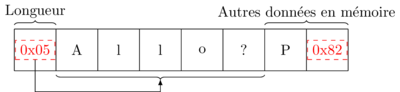

In [8]:
%%tikz -l calc,decorations.pathreplacing
\def\printit#1#2\relax{\ifx*#1\relax\node (node\x)
  [rectangle,draw,dashed,red] at ($(.5,.5)+(\x,0)$) {0x#2}\else\node
  (node\x) at ($(.5,.5)+(\x,0)$) {#1#2} \fi}

\draw (-1,0) grid (7,1);
\foreach \x/\y in
      {-1/*05,0/A,1/l,2/l,3/o,4/?,5/P,6/*82} { \expandafter\printit\y\relax; }

\draw[decorate,decoration={brace,amplitude=1mm,mirror,raise=1mm},yshift=0pt]
      (0,0)--(5,0);
\draw[-latex] (node-1)|-(0,-.5)-|(2.5,-.2);
\draw[decorate,decoration={brace,amplitude=1mm,raise=1mm},yshift=0pt]
      (5,1)--(7,1)  node [black,midway,yshift=12pt] {Autres données en mémoire};
\draw[decorate,decoration={brace,amplitude=1mm,raise=1mm},yshift=0pt]
      (-1,1)--(0,1) node [black,midway,yshift=12pt] {Longueur};


### Caractère terminal
Une autre possibilité est de marquer la fin de la chaîne avec un octet
particulier ou une séquence d'octets particulière.  C'est le cas du langage
C (et de beaucoup d'autres langages dérivés) qui utilise le caractère nul.

À l'intérieur d'un langage il n'y a en général qu'une seule sorte de
chaîne.

> __Remarque :__ *Est-ce que le marqueur fait partie de la chaîne ?* En pratique, oui. Mais il ne fait pas partie du *texte* codé par la chaîne.

> **Exemple :** On stocke ici la chaîne « Allo? » (le P et la valeur 0x82 sont des éléments qui sont dans la mémoire mais ne font pas partie de la chaîne).

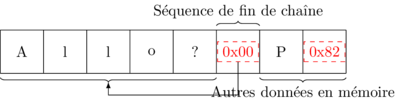

In [9]:
%%tikz -l calc,decorations.pathreplacing
\def\printit#1#2\relax{\ifx*#1\relax\node (node\x)
[rectangle,draw,dashed,red] at ($(.5,.5)+(\x,0)$) {0x#2}\else\node
(node\x) at ($(.5,.5)+(\x,0)$) {#1#2} \fi}
\draw (0,0) grid (8,1); \foreach \x/\y in
{0/A,1/l,2/l,3/o,4/?,5/*00,6/P,7/*82} { \expandafter\printit\y\relax; }
\draw
[decorate,decoration={brace,amplitude=1mm,mirror,raise=1mm},yshift=0pt]
(0,0)--(5,0); \draw[-latex] (node5)|-(4,-.5)-|(2.5,-.2);
\draw[decorate,decoration={brace,amplitude=1mm,mirror,raise=1mm},yshift=0pt]
      (6,0)--(8,0)  node [black,midway,yshift=-12pt] {Autres données en mémoire};
\draw[decorate,decoration={brace,amplitude=1mm,raise=1mm},yshift=0pt]
      (5,1)--(6,1) node [black,midway,yshift=12pt] {Séquence de fin de chaîne};


### L'échappement

Premier problème, le choix de la séquence de fin.

1. Quand la longueur n'est pas spécifiée à côté d'une chaîne, la fin de la chaîne est forcément indiquée par une séquence spécifique de bits.
2. S'il existe une séquence spécifique invalide dans le codage pour la représentation de caractères, alors on peut la choisir comme représentant la fin de chaîne.
3. Sinon, il faut choisir un caractère qui va coder la fin de la chaîne.
4. Comment coder une chaîne qui comporte ce caractère ?

Deuxième problème, les séquences signifiantes.

Parfois, on veut pouvoir utiliser dans des chaînes des séquences qui ont
un sens spécial. Par exemple, on pourrait vouloir que  `0x0F03`
représente le caractère ༃ qu'on
ne peut pas rentrer facilement au clavier. Mais dans ce cas, comment
écrire la chaîne `0x0F03` ? (comme par exemple pour la phrase « Si on
met 0x0F03 dans une chaîne on obtient le
caractère ༃ » ?

Il faut donc utiliser une procédure d'échappement !

\item On utilise une séquence (parfois codante) d'échappement qui permet de
modifier le sens des caractères qui suivent
\item Si la séquence d'échappement est codante, on doit prévoir au moins une
combinaison qui permet de redonner le caractère d'échappement
\item Avoir des chaînes interprétables complique énormément les opérations
élémentaires, comme calculer le nombre de caractères dans la chaîne, ou
savoir si un caractère est présent dans la chaîne.
\item[\dialogwarning] On se retrouve souvent à «~empiler~» les modes
d'échappement identiques ou différents.
\end{itemize}

> **Exemple :** En langage C et d'autres (Python par exemple), le caractère `\` est utilisé pour
introduire des séquences d'échappement. `\0` est le caractère nul, `\n` est le caractère de nouvelle ligne, `\t` est le caractère de tabulation, `\xxx` est le caractère de numéro octal _xxx_... 

In [10]:
u.activite("Échappements en C")
u.mark("Dessinez la structure en mémoire ds chaînes C suivantes, et montrez comment elles s'affichent sur un terminal.")
strings=[[b"Toto",b"Kaivik"],[b"Bonjour !\n",b"C'est lundi !\n"],[b"Acheter:\n\tponey\n\tporte-avions\n",b"Un philosophe\n\tparle\ndu temps.\n"],[b"Caf\303\251\n",b"Cr\303\250me"]]

def displaychar(l):
    n=''
    if l<128 and l>32:
        n=chr(l)
    elif l==32:
        n='⍽'
    elif l==10:
        n='\\n'
    elif l==9:
        n='\\t'
    elif l==0:
        n='\\0'
    else:
        n='\\{0:03o}'.format(l)
    return n


for sx in strings:
    s=random.choice(sx)
    a=''
    t=[]
    h=[]
    lh=[]
    i=0
    for l in s:
        n=displaychar(l)
        a=a+n
        t.append(n)
        h.append(str(i))
        i=i+1
        lh.append("-")
    n=displaychar(0)
    t.append(n)
    h.append(str(i))
    i=i+1
    lh.append("-")
    table='\n'.join( [ "|"+("|".join(uu))+"|" for uu in [h,lh,t]])
    u.mark('  * `{0}`'.format(a))
    u.mark(table)
    u.mark('Affichage:<pre>{0}</pre>'.format(s.decode('utf8')))
    if s.decode('utf8')!=s.decode('iso-8859-15'):
        u.mark('_Attention, l´affichage ci-dessus dépend du terminal ! Ici on a choisi UTF-8_')

#### Activité : Échappements en C

Dessinez la structure en mémoire ds chaînes C suivantes, et montrez comment elles s'affichent sur un terminal.

  * `Kaivik`

|0|1|2|3|4|5|6|
|-|-|-|-|-|-|-|
|K|a|i|v|i|k|\0|

Affichage:<pre>Kaivik</pre>

  * `C'est⍽lundi⍽!\n`

|0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
|C|'|e|s|t|⍽|l|u|n|d|i|⍽|!|\n|\0|

Affichage:<pre>C'est lundi !
</pre>

  * `Acheter:\n\tponey\n\tporte-avions\n`

|0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18|19|20|21|22|23|24|25|26|27|28|29|30|
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
|A|c|h|e|t|e|r|:|\n|\t|p|o|n|e|y|\n|\t|p|o|r|t|e|-|a|v|i|o|n|s|\n|\0|

Affichage:<pre>Acheter:
	poney
	porte-avions
</pre>

  * `Cr\303\250me`

|0|1|2|3|4|5|6|
|-|-|-|-|-|-|-|
|C|r|\303|\250|m|e|\0|

Affichage:<pre>Crème</pre>

_Attention, l´affichage ci-dessus dépend du terminal ! Ici on a choisi UTF-8_

In [11]:
u.activite("Échappements en C — la vengeance")
from ast import literal_eval
u.mark("Une bizarrerie historique du C/C++ fait que certaines séquences sont remplacées avant que le programme ne soit exécuté par d'autres caractères:")
trigraphes={
    '??(':'[',
    '??)':']',
    '??<':'{',
    '??>':'}',
    '??=':'#',
    '??/':'\\',
    '??\'':'^',
    '??!':'|',
    '??-':'~'
    }
t="|Trigraphe|Résultat|\n|-|-|\n|"+"|\n|".join([u+"|"+(v if v!="|" else "&vert;") for u,v in trigraphes.items()])+"|\n"
u.mark(t)

u.mark("Dessinez la structure en mémoire ds chaînes C suivantes telles qu'elles sont dans la mémoire du programme exécuté, et montrez comment elles s'affichent sur un terminal.")
strings=[[b"Hello??!"],[b"Bye??/n"]]
def displaychar(l):
    n=''
    if l<128 and l>32:
        n=chr(l)
    elif l==32:
        n='⍽'
    elif l==10:
        n='\\n'
    elif l==9:
        n='\\t'
    elif l==0:
        n='\\0'
    else:
        n='\\{0:03o}'.format(l)
    return n

for sx in strings:
    s=random.choice(sx)
    sasstring=s.decode("utf-8")
    for key,val in trigraphes.items():
        sasstring=sasstring.replace(key,val)
    print
    st=bytes(literal_eval('"'+sasstring+'"'),encoding="utf-8")
    a=''
    for l in s:
        n=displaychar(l)
        a=a+n
    t=[]
    h=[]
    lh=[]
    i=0
    for l in st:
        n=displaychar(l)
        t.append(n)
        h.append(str(i))
        i=i+1
        lh.append("-")
    n=displaychar(0)
    t.append(n)
    h.append(str(i))
    i=i+1
    lh.append("-")
    table='\n'.join( [ "|"+("|".join(uu))+"|" for uu in [h,lh,t]])
    u.mark('  * `{0}`'.format(a))
    u.mark(table)
    u.mark('Affichage:<pre>{0}</pre>'.format(st.decode('utf8')))
    if st.decode('utf8')!=st.decode('iso-8859-15'):
        u.mark('_Attention, l´affichage ci-dessus dépend du terminal ! Ici on a choisi UTF-8_')
u.mark("Quels sont les problèmes qui pourraient arriver avec ce système tel qu'il est décrit ?")
u.solution("Outre des choses surprenantes lorsqu'on ne connaît pas leur existence, il est difficile de représenter une suite de deux points d'interrogation suivis par exemple d'un point d'exclamation.")

#### Activité : Échappements en C — la vengeance

Une bizarrerie historique du C/C++ fait que certaines séquences sont remplacées avant que le programme ne soit exécuté par d'autres caractères:

|Trigraphe|Résultat|
|-|-|
|??(|[|
|??)|]|
|??<|{|
|??>|}|
|??=|#|
|??/|\|
|??'|^|
|??!|&vert;|
|??-|~|


Dessinez la structure en mémoire ds chaînes C suivantes telles qu'elles sont dans la mémoire du programme exécuté, et montrez comment elles s'affichent sur un terminal.

  * `Hello??!`

|0|1|2|3|4|5|6|
|-|-|-|-|-|-|-|
|H|e|l|l|o|||\0|

Affichage:<pre>Hello|</pre>

  * `Bye??/n`

|0|1|2|3|4|
|-|-|-|-|-|
|B|y|e|\n|\0|

Affichage:<pre>Bye
</pre>

Quels sont les problèmes qui pourraient arriver avec ce système tel qu'il est décrit ?

Votre proposition > `_____________________________________________________`

**Solution:** Outre des choses surprenantes lorsqu'on ne connaît pas leur existence, il est difficile de représenter une suite de deux points d'interrogation suivis par exemple d'un point d'exclamation.

In [12]:
u.xtoggle()

Mode interactif
